In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df_train =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/titanic/train (1).csv")
df_test =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/titanic/test.csv")
print(df_train.keys())
df_train

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
X = df_train[['Sex','Pclass','Age','Fare','Survived']]
X.isnull().sum()

Sex           0
Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [ ]:
X = X.dropna()
X.isnull().sum()

Sex         0
Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [ ]:
X.describe()

,Pclass,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.406162
std,0.838250,14.526497,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000
50%,2.000000,28.000000,15.741700,0.000000
75%,3.000000,38.000000,33.375000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [ ]:
y = X['Survived']
X = X[['Sex','Pclass','Age','Fare']]

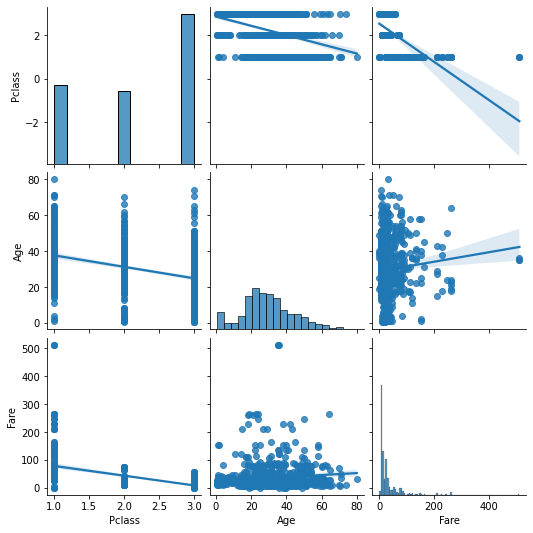

In [ ]:
sns.pairplot(X,kind = 'reg')

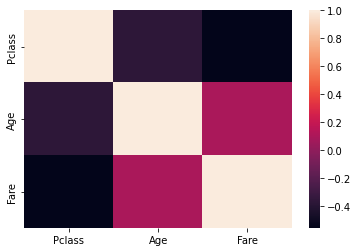

In [ ]:
sns.heatmap(X.corr())

In [ ]:
X['Sex'] = X['Sex'].map({'male':0,'female':1})
X['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: Sex, Length: 714, dtype: int64

In [ ]:
X['Sex'].unique()

array([0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y,random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571, 4) (143, 4) (571,) (143,)


In [ ]:
reg_logistica = LogisticRegression(C = 1,
                                   multi_class = 'auto',
                                   random_state = 0,
                                   n_jobs = -1    
)
reg_logistica

LogisticRegression(C=1, n_jobs=-1, random_state=0)

In [ ]:
reg_logistica.fit(X_train,y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=0)

In [ ]:
print('Intercepto',reg_logistica.intercept_)
print('Coeficientes',reg_logistica.coef_[0])
print(X_train.keys())

Intercepto [2.54396338]
Coeficientes [ 2.25342690e+00 -1.22240092e+00 -3.97309867e-02  2.44682376e-05]
Index(['Sex', 'Pclass', 'Age', 'Fare'], dtype='object')


In [ ]:
from math import exp
form =reg_logistica.intercept_+reg_logistica.coef_[0][0]*0+reg_logistica.coef_[0][1]*3+reg_logistica.coef_[0][2]*1+reg_logistica.coef_[0][3]*500
pos = exp(form)
prob = pos/(pos+1)
prob


0.006156300537023926

In [ ]:
y_pred_train = reg_logistica.predict(X_train)
y_pred_train

In [ ]:
print('Exactitud',metrics.accuracy_score(y_train,y_pred_train))

Exactitud 0.7950963222416813


In [ ]:
conf = metrics.confusion_matrix(y_train,y_pred_train)
print(conf)

[[286  53]
 [ 64 168]]


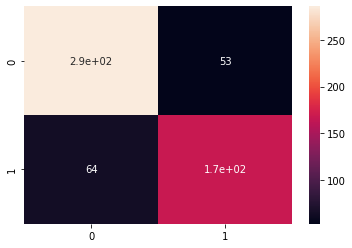

In [ ]:
sns.heatmap(conf, annot = True)

Exactitud 0.8321678321678322
[[78  7]
 [17 41]]


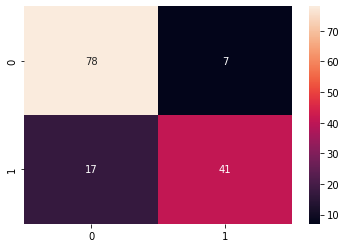

In [ ]:
y_pred_test = reg_logistica.predict(X_test)
print('Exactitud',metrics.accuracy_score(y_test,y_pred_test))
conf = metrics.confusion_matrix(y_test,y_pred_test)
print(conf)
sns.heatmap(conf, annot = True)

In [ ]:
acc = []
for max_i in range(1,25):
  reg_logistica = LogisticRegression(C = 1000,
                                    multi_class = 'auto',
                                    random_state = 0,
                                    n_jobs = -1,
                                    max_iter= max_i     
  )
  reg_logistica.fit(X_train,y_train)
  y_pred_test = reg_logistica.predict(X_test)
  print('Exactitud',max_i,metrics.accuracy_score(y_test,y_pred_test),metrics.log_loss(y_test,y_pred_test))
  acc.append([max_i,metrics.accuracy_score(y_test,y_pred_test),metrics.log_loss(y_test,y_pred_test)])

Exactitud 1 0.6573426573426573 11.835054803562985
Exactitud 2 0.6713286713286714 11.351972627482269
Exactitud 3 0.6643356643356644 11.593502532341784
Exactitud 4 0.6573426573426573 11.8350324372013
Exactitud 5 0.6643356643356644 11.593502532341784
Exactitud 6 0.6783216783216783 11.11042594785149
Exactitud 7 0.6993006993006993 10.385813866911262
Exactitud 8 0.6923076923076923 10.627354954951617
Exactitud 9 0.6923076923076923 10.627354954951617
Exactitud 10 0.7062937062937062 10.144278370461326
Exactitud 11 0.7132867132867133 9.902737282420967
Exactitud 12 0.7132867132867133 9.902737282420967
Exactitud 13 0.7622377622377622 8.212044723175625
Exactitud 14 0.7692307692307693 7.970509226725688
Exactitud 15 0.8111888111888111 6.521335389159018
Exactitud 16 0.8391608391608392 5.555226952901798
Exactitud 17 0.8391608391608392 5.555226952901798
Exactitud 18 0.8391608391608392 5.555226952901798
Exactitud 19 0.8391608391608392 5.555226952901798
Exactitud 20 0.8391608391608392 5.555226952901798
Ex

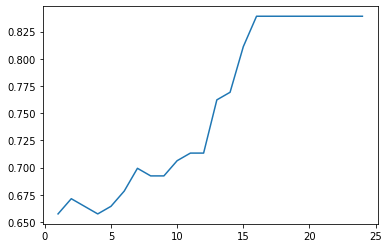

In [ ]:
df_acc = pd.DataFrame(acc)
plt.plot(df_acc[0],df_acc[1])

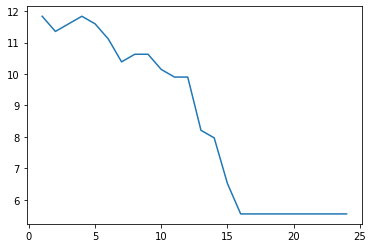

In [ ]:

plt.plot(df_acc[0],df_acc[2])